<a href="https://colab.research.google.com/github/JorgeRicardo6050/Tareas-IA-/blob/main/CNNPropio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importamos las librerías necesarias
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
# Cargamos el dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [3]:
# Normalizamos los datos (escalamos los valores de píxeles entre 0 y 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
# Convertimos las etiquetas a formato categórico
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

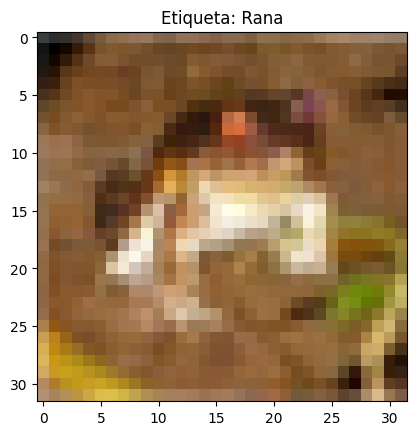

In [5]:
# Mostramos un ejemplo del dataset
class_names = ['Avión', 'Automóvil', 'Pájaro', 'Gato', 'Ciervo', 'Perro', 'Rana', 'Caballo', 'Barco', 'Camión']
plt.imshow(x_train[0])
plt.title(f"Etiqueta: {class_names[y_train[0].argmax()]}")
plt.show()

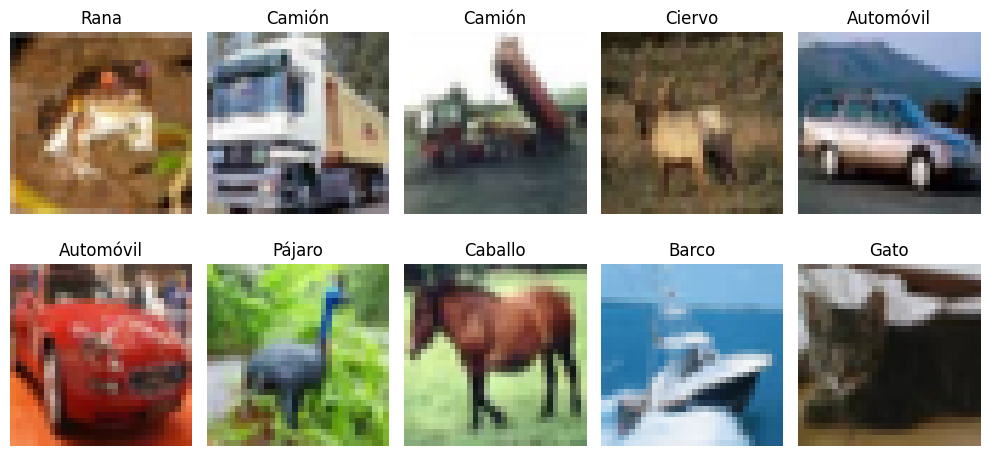

In [6]:
# Mostramos 10 ejemplos del dataset con sus etiquetas
plt.figure(figsize=(10, 5))  # Ajustamos el tamaño de la figura
for i in range(10):
    plt.subplot(2, 5, i + 1)  # Creamos una cuadrícula de 2 filas y 5 columnas
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i].argmax()])
    plt.axis('off')  # Ocultamos los ejes
plt.tight_layout()
plt.show()

In [7]:
# Definimos el modelo de red neuronal convolucional
modelo = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),  # Primera capa convolucional
    layers.MaxPooling2D((2, 2)),  # Primera capa de pooling
    layers.Conv2D(64, (3, 3), activation='relu'),  # Segunda capa convolucional
    layers.MaxPooling2D((2, 2)),  # Segunda capa de pooling
    layers.Conv2D(128, (3, 3), activation='relu'),  # Tercera capa convolucional
    layers.MaxPooling2D((2, 2)),  # Tercera capa de pooling
    layers.Flatten(),  # Aplanamos las características
    layers.Dense(128, activation='relu'),  # Capa completamente conectada
    layers.Dense(10, activation='softmax')  # Capa de salida con 10 clases
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compilamos el modelo
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
# Entrenamos el modelo
print("Comenzando entrenamiento...")
historial = modelo.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_test, y_test)
)
print("Entrenamiento finalizado!")

Comenzando entrenamiento...
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 48ms/step - accuracy: 0.3446 - loss: 1.7584 - val_accuracy: 0.5284 - val_loss: 1.3139
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 49ms/step - accuracy: 0.5750 - loss: 1.1930 - val_accuracy: 0.6350 - val_loss: 1.0419
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 48ms/step - accuracy: 0.6560 - loss: 0.9880 - val_accuracy: 0.6654 - val_loss: 0.9519
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 48ms/step - accuracy: 0.6981 - loss: 0.8681 - val_accuracy: 0.6825 - val_loss: 0.9148
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 49ms/step - accuracy: 0.7293 - loss: 0.7777 - val_accuracy: 0.6955 - val_loss: 0.8801
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.7515 - loss: 0.7075 - val_accuracy: 0.6881 - val_loss: 0.9043
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.7691 - loss: 0.6555 - val_accuracy: 0.7158 - val_loss: 0.8436
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 48

In [10]:
# Evaluamos el modelo con los datos de prueba
test_loss, test_acc = modelo.evaluate(x_test, y_test, verbose=2)
print(f"Precisión en los datos de prueba: {test_acc:.2f}")

313/313 - 5s - 16ms/step - accuracy: 0.7164 - loss: 0.8906
Precisión en los datos de prueba: 0.72


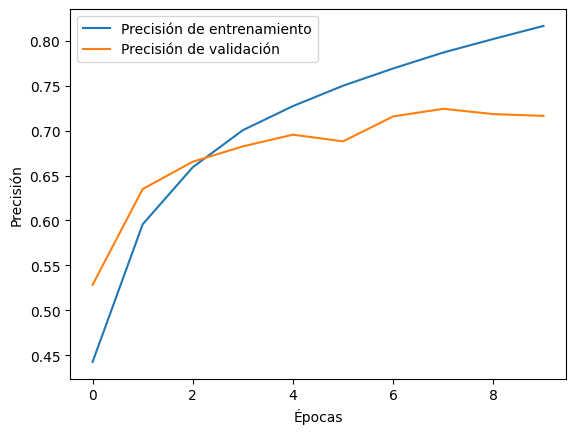

In [11]:
# Graficamos la precisión y la pérdida
plt.plot(historial.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(historial.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

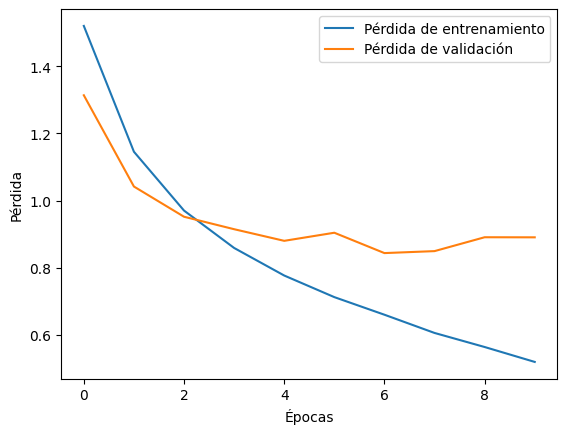

In [12]:
plt.plot(historial.history['loss'], label='Pérdida de entrenamiento')
plt.plot(historial.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()